In [1]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

humanCapital = pd.read_excel('Data/SBDC Human Capital Survey Data 4.1.24.xlsx')
hours = pd.read_excel('Data/Consulting Hours.xlsx')
capital = pd.read_excel('Data/Capital Milestones.xlsx')
established = pd.read_excel('Data/Business Established.xlsx')

In [2]:
humanCapital = humanCapital.drop(['ResponseId', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 
                                  'RecordedDate', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
                                  'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore'], axis=1)

humanCapital.columns = humanCapital.iloc[0]
humanCapital = humanCapital[1:].reset_index(drop=True)

humanCapital

,What state/network are you completing the survey for?,Center Information #1 - Number of FT Staff,Center Information #1 - Number of PT Staff,Center Information #1 - Number of contracted consultants,"Center Information #1 - Total contact, prep, travel time for 2023","Center Information #1 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #1 - Number of clients,Center Information #1 - What is the population of the region?,Center Information #1 - Is the center location rural or urban?,Center Information #1 - Does the Center Director have employees reporting directly to them?,Center Information #1 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #2 - Number of FT Staff,Center Information #2 - Number of PT Staff,Center Information #2 - Number of contracted consultants,"Center Information #2 - Total contact, prep, travel time for 2023","Center Information #2 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #2 - Number of clients,Center Information #2 - What is the population of the region?,Center Information #2 - Is the center location rural or urban?,Center Information #2 - Does the Center Director have employees reporting directly to them?,Center Information #2 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #3 - Number of FT Staff,Center Information #3 - Number of PT Staff,Center Information #3 - Number of contracted consultants,"Center Information #3 - Total contact, prep, travel time for 2023","Center Information #3 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #3 - Number of clients,Center Information #3 - What is the population of the region?,Center Information #3 - Is the center location rural or urban?,Center Information #3 - Does the Center Director have employees reporting directly to them?,Center Information #3 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #4 - Number of FT Staff,Center Information #4 - Number of PT Staff,Center Information #4 - Number of contracted consultants,"Center Information #4 - Total contact, prep, travel time for 2023","Center Information #4 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #4 - Number of clients,Center Information #4 - What is the population of the region?,Center Information #4 - Is the center location rural or urban?,Center Information #4 - Does the Center Director have employees reporting directly to them?,Center Information #4 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #5 - Number of FT Staff,Center Information #5 - Number of PT Staff,Center Information #5 - Number of contracted consultants,"Center Information #5 - Total contact, prep, travel time for 2023","Center Information #5 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #5 - Number of clients,Center Information #5 - What is the population of the region?,Center Information #5 - Is the center location rural or urban?,Center Information #5 - Does the Center Director have employees reporting directly to them?,Center Information #5 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #6 - Number of FT Staff,Center Information #6 - Number of PT Staff,Center Information #6 - Number of contracted consultants,"Center Information #6 - Total contact, prep, travel time for 2023","Center Information #6 - Tota

# Data Engineering

In [3]:
nDakota = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'North Dakota']
sDakota = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'South Dakota']
iowa = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'The best State (Iowa)']
wyoming = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'Wyoming SBDC Network ']
nebraska = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'Nebraska Business Development Center (NBDC)'].drop(
    ['What state/network are you completing the survey for?'], axis=1)
newMexico = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'New Mexico Small Business Development Center']
kansas = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'Kansas']
montana = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'Montana']

In [4]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in nebraska.columns if 'Center Information #' in col]))

nebraska_centers = []
for center in centers:
    center_columns = [col for col in nebraska.columns if f'Center Information #{center} ' in col]
    
    center_df = nebraska[center_columns].copy() 
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Nebraska'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]
        
        globals()[f'nebraska{center}'] = center_df
        nebraska_centers.append(globals()[f'nebraska{center}'])

In [5]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in sDakota.columns if 'Center Information #' in col]))

sDakota_centers = []
for center in centers:
    center_columns = [col for col in sDakota.columns if f'Center Information #{center} ' in col]
    
    center_df = sDakota[center_columns].copy()
    
    if not center_df.isna().all().all(): 

        center_df.loc[:, 'State'] = 'South Dakota'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'sDakota{center}'] = center_df
        sDakota_centers.append(globals()[f'sDakota{center}'])

In [6]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in nDakota.columns if 'Center Information #' in col]))

nDakota_centers = []
for center in centers:
    center_columns = [col for col in nDakota.columns if f'Center Information #{center} ' in col]
    
    center_df = nDakota[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'North Dakota'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'nDakota{center}'] = center_df
        nDakota_centers.append(globals()[f'nDakota{center}'])

In [7]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in iowa.columns if 'Center Information #' in col]))

iowa_centers = []
for center in centers:
    center_columns = [col for col in iowa.columns if f'Center Information #{center} ' in col]
    
    center_df = sDakota[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Iowa'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'iowa{center}'] = center_df
        iowa_centers.append(globals()[f'iowa{center}'])

In [8]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in wyoming.columns if 'Center Information #' in col]))

wyoming_centers = []
for center in centers:
    center_columns = [col for col in sDakota.columns if f'Center Information #{center} ' in col]
    
    center_df = wyoming[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Wyoming'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'wyoming{center}'] = center_df
        wyoming_centers.append(globals()[f'wyoming{center}'])

In [9]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in newMexico.columns if 'Center Information #' in col]))

newMexico_centers = []
for center in centers:
    center_columns = [col for col in newMexico.columns if f'Center Information #{center} ' in col]
    
    center_df = newMexico[center_columns].copy()

    if not center_df.isna().all().all():
        center_df['State'] = 'New Mexico'
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]
        
        globals()[f'newMexico{center}'] = center_df
        newMexico_centers.append(center_df)

In [10]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in kansas.columns if 'Center Information #' in col]))

kansas_centers = []
for center in centers:
    center_columns = [col for col in kansas.columns if f'Center Information #{center} ' in col]  # Correct reference here
    
    center_df = kansas[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Kansas'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'kansas{center}'] = center_df
        kansas_centers.append(globals()[f'kansas{center}'])

In [11]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in montana.columns if 'Center Information #' in col]))

montana_centers = []
for center in centers:
    center_columns = [col for col in newMexico.columns if f'Center Information #{center} ' in col]
    
    center_df = montana[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Montana'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'montana{center}'] = center_df
        montana_centers.append(globals()[f'montana{center}'])

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

state_center_lists = [
    nebraska_centers, sDakota_centers, nDakota_centers, iowa_centers, 
    wyoming_centers, newMexico_centers, kansas_centers, montana_centers
]
state_names = [
    'Nebraska', 'South Dakota', 'North Dakota', 'Iowa', 
    'Wyoming', 'New Mexico', 'Kansas', 'Montana'
]

data = []

for state_centers, state_name in zip(state_center_lists, state_names):
    center_number = 1
    for center_df in state_centers:
        ft_staff_cols = [col for col in center_df.columns if 'Number of FT Staff' in col]
        pt_staff_cols = [col for col in center_df.columns if 'Number of PT Staff' in col]
        consultant_cols = [col for col in center_df.columns if 'Number of contracted consultants' in col]
        counseling_time_cols = [col for col in center_df.columns if 'Total contact, prep, travel time for 2023' in col]
        population_cols = [col for col in center_df.columns if 'What is the population of the region' in col]
        location_cols = [col for col in center_df.columns if 'Is the center location rural or urban' in col]
        hr_support_cols = [col for col in center_df.columns if 'HR paperwork for employees/review and reconciliation of invoices for consultants' in col]
        client_cols = [col for col in center_df.columns if 'Number of clients' in col]
        program_related_time_cols = [col for col in center_df.columns if 'Total hours spent on other program-related activity' in col]
        employees_reporting_cols = [col for col in center_df.columns if 'Does the Center Director have employees reporting directly to them' in col]

        total_ft_staff = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in ft_staff_cols]) if ft_staff_cols else 0
        total_pt_staff = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in pt_staff_cols]) if pt_staff_cols else 0
        total_consultants = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in consultant_cols]) if consultant_cols else 0
        total_staff = total_ft_staff + total_pt_staff + total_consultants
        
        total_counseling_time = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in counseling_time_cols]) if counseling_time_cols else 0
        
        population = sum([pd.to_numeric(center_df[col].astype(str).str.replace(',', ''), errors='coerce').sum() for col in population_cols]) if population_cols else 0
        
        location = center_df[location_cols].iloc[0] if location_cols and not center_df[location_cols].isna().all().all() else ''
        is_urban = 1 if isinstance(location, str) and 'urban' in location.lower() else 0
        
        hr_support = 1 if center_df[hr_support_cols].eq('Yes').any().any() else 0
        num_clients = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in client_cols]) if client_cols else 0
        program_related_time = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in program_related_time_cols]) if program_related_time_cols else 0
        has_employees_reporting = 1 if center_df[employees_reporting_cols].eq('Yes').any().any() else 0

        data.append({
            'State': state_name,
            'Center Number': center_number,
            'Total Staff': total_staff,
            'Population': population,
            'Is Urban': is_urban,
            'HR Support': hr_support,
            'Total Counseling Time': total_counseling_time,
            'Number of Clients': num_clients,
            'Program-Related Activity Time': program_related_time,
            'Has Employees Reporting': has_employees_reporting
        })

        center_number += 1

center_analysis = pd.DataFrame(data)

numeric_cols = center_analysis.columns.difference(['State'])
center_analysis[numeric_cols] = center_analysis[numeric_cols].apply(pd.to_numeric, errors='coerce')

predictors = ['Total Staff', 'Population', 'Is Urban', 'HR Support', 'Number of Clients', 
              'Program-Related Activity Time', 'Has Employees Reporting', 'Responsible for Paperwork']

# for predictor in predictors:
#     plt.figure(figsize=(8, 6))
    
#     plt.scatter(center_analysis[predictor], center_analysis['Total Counseling Time'], alpha=0.5)
    
#     plt.title(f'Relationship between {predictor} and Total Counseling Time')
#     plt.xlabel(predictor)
#     plt.ylabel('Total Counseling Time')
    
#     plt.show()

center_analysis.to_excel('Deliverables/SBDC Human Capital Full Dataset.xlsx', index=False)
center_analysis

,State,Center Number,Total Staff,Population,Is Urban,HR Support,Total Counseling Time,Number of Clients,Program-Related Activity Time,Has Employees Reporting
0,Nebraska,1,8.0,811625,0,0,857.00,424,832.00,1
1,Nebraska,2,2.0,503116,0,1,363.00,106,125.00,1
2,Nebraska,3,1.0,244314,0,1,525.00,83,120.00,0
3,Nebraska,4,1.0,254971,0,0,392.00,86,480.00,0
4,Nebraska,5,1.0,56691,0,0,95.00,40,20.00,0
5,Nebraska,6,1.0,80866,0,0,62.00,52,226.00,0
6,Nebraska,7,3.0,25078,0,1,231.00,28,72.00,1
7,South Dakota,1,3.0,104677,0,1,703.53,170,0.00,1
8,South Dakota,2,2.0,67488,0,0,341.97,98,0.00,0
9,South Dakota,3,4.0,197874,0,1,837.55,346,0.00,1


# Linear Regression

In [13]:
# from scipy.stats import zscore

# center_analysis_z = center_analysis
# center_analysis_z[numeric_cols] = center_analysis_z[numeric_cols].apply(zscore)
# center_analysis_z = center_analysis_z.drop(['Is Urban', 'HR Support', 'Has Employees Reporting'], axis=1)

# center_analysis_z

In [14]:
from scipy.optimize import nnls
import numpy as np


center_analysis = center_analysis[(center_analysis['Total Staff'] > 0) & 
                                  (center_analysis['Number of Clients'] > 0) & 
                                  (center_analysis['Total Counseling Time'] > 0)]

center_analysis.index = np.arange(1, len(center_analysis) + 1)

X = center_analysis[['Total Staff', 'Population', 'Is Urban', 'HR Support', 'Number of Clients', 
                     'Program-Related Activity Time', 'Has Employees Reporting']].values
y = center_analysis['Total Counseling Time'].values

coef, _ = nnls(X, y)

predicted_counseling_times = np.dot(X, coef)

center_analysis['Predicted Counseling Time'] = predicted_counseling_times

center_analysis['Expected Hours per Consultant'] = center_analysis['Predicted Counseling Time'] / center_analysis['Total Staff']
center_analysis['Expected Hours per Client'] = center_analysis['Predicted Counseling Time'] / center_analysis['Number of Clients']

center_analysis['Expected Hours per Consultant'] = center_analysis['Expected Hours per Consultant'].apply(lambda x: max(x, 0))
center_analysis['Expected Hours per Client'] = center_analysis['Expected Hours per Client'].apply(lambda x: max(x, 0))

center_analysis

C:\Users\Ghaith\AppData\Local\Temp\ipykernel_57248\2342294478.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  center_analysis['Predicted Counseling Time'] = predicted_counseling_times
C:\Users\Ghaith\AppData\Local\Temp\ipykernel_57248\2342294478.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  center_analysis['Expected Hours per Consultant'] = center_analysis['Predicted Counseling Time'] / center_analysis['Total Staff']
C:\Users\Ghaith\AppData\Local\Temp\ipykernel_57248\2342294478.py:22: SettingWit

,State,Center Number,Total Staff,Population,Is Urban,HR Support,Total Counseling Time,Number of Clients,Program-Related Activity Time,Has Employees Reporting,Predicted Counseling Time,Expected Hours per Consultant,Expected Hours per Client
1,Nebraska,1,8.0,811625,0,0,857.00,424,832.00,1,2155.228182,269.403523,5.083085
2,Nebraska,2,2.0,503116,0,1,363.00,106,125.00,1,1312.486541,656.243271,12.381949
3,Nebraska,3,1.0,244314,0,1,525.00,83,120.00,0,879.736306,879.736306,10.599233
4,Nebraska,4,1.0,254971,0,0,392.00,86,480.00,0,537.327248,537.327248,6.247991
5,Nebraska,5,1.0,56691,0,0,95.00,40,20.00,0,197.040700,197.040700,4.926017
6,Nebraska,6,1.0,80866,0,0,62.00,52,226.00,0,272.707078,272.707078,5.244367
7,Nebraska,7,3.0,25078,0,1,231.00,28,72.00,1,857.160160,285.720053,30.612863
8,South Dakota,1,3.0,104677,0,1,703.53,170,0.00,1,937.851066,312.617022,5.516771
9,South Dakota,2,2.0,67488,0,0,341.97,98,0.00,0,330.971342,165.485671,3.377259
10,South Dakota,3,4.0,197874,0,1,837.55,346,0.00,1,1176.225592,294.056398,3.399496


In [15]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y, predicted_counseling_times, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

model_summary = sm.OLS(y, X).fit().summary()
print(model_summary)

Root Mean Squared Error (RMSE): 559.2191981459756
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              66.77
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                    1.03e-23
Time:                        01:30:38   Log-Likelihood:                         -469.79
No. Observations:                  62   AIC:                                      951.6
Df Residuals:                      56   BIC:                                      964.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

c:\Users\Ghaith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


center_analysis = pd.DataFrame(data)

numeric_cols = center_analysis.columns.difference(['State'])
center_analysis[numeric_cols] = center_analysis[numeric_cols].apply(pd.to_numeric, errors='coerce')

center_analysis = center_analysis[(center_analysis['Total Staff'] > 0) & 
                                  (center_analysis['Number of Clients'] > 0) & 
                                  (center_analysis['Total Counseling Time'] > 0)]

center_analysis.index = np.arange(1, len(center_analysis) + 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=290, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
predicted_counseling_times = rf_model.predict(X)

r2 = r2_score(y, predicted_counseling_times)
print(f"R² score: {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

center_analysis['Predicted Counseling Time'] = predicted_counseling_times

center_analysis['Expected Hours per Consultant'] = center_analysis['Predicted Counseling Time'] / center_analysis['Total Staff']
center_analysis['Expected Hours per Client'] = center_analysis['Predicted Counseling Time'] / center_analysis['Number of Clients']

center_analysis['Expected Hours per Consultant'] = center_analysis['Expected Hours per Consultant'].apply(lambda x: max(x, 0))
center_analysis['Expected Hours per Client'] = center_analysis['Expected Hours per Client'].apply(lambda x: max(x, 0))

# center_analysis

R² score: 0.8340371545994679
Root Mean Squared Error: 667.1973996635771


In [17]:
rf_model = RandomForestRegressor(n_estimators=290, random_state=42)
rf_model.fit(X, y)

predicted_counseling_times = rf_model.predict(X)

center_analysis['Predicted Counseling Time'] = predicted_counseling_times

center_analysis['Expected Hours per Consultant'] = center_analysis['Predicted Counseling Time'] / center_analysis['Total Staff']
center_analysis['Expected Hours per Client'] = center_analysis['Predicted Counseling Time'] / center_analysis['Number of Clients']

center_analysis['Expected Hours per Consultant'] = center_analysis['Expected Hours per Consultant'].apply(lambda x: max(x, 0))
center_analysis['Expected Hours per Client'] = center_analysis['Expected Hours per Client'].apply(lambda x: max(x, 0))

center_analysis.to_excel('Deliverables/Predicted Consultant and Client Hours.xlsx', index=False)
center_analysis

,State,Center Number,Total Staff,Population,Is Urban,HR Support,Total Counseling Time,Number of Clients,Program-Related Activity Time,Has Employees Reporting,Predicted Counseling Time,Expected Hours per Consultant,Expected Hours per Client
1,Nebraska,1,8.0,811625,0,0,857.00,424,832.00,1,1623.383586,202.922948,3.828735
2,Nebraska,2,2.0,503116,0,1,363.00,106,125.00,1,882.983414,441.491707,8.330032
3,Nebraska,3,1.0,244314,0,1,525.00,83,120.00,0,526.530345,526.530345,6.343739
4,Nebraska,4,1.0,254971,0,0,392.00,86,480.00,0,563.418793,563.418793,6.551381
5,Nebraska,5,1.0,56691,0,0,95.00,40,20.00,0,143.841724,143.841724,3.596043
6,Nebraska,6,1.0,80866,0,0,62.00,52,226.00,0,206.145655,206.145655,3.964340
7,Nebraska,7,3.0,25078,0,1,231.00,28,72.00,1,238.562172,79.520724,8.520078
8,South Dakota,1,3.0,104677,0,1,703.53,170,0.00,1,713.962897,237.987632,4.199782
9,South Dakota,2,2.0,67488,0,0,341.97,98,0.00,0,373.962207,186.981103,3.815941
10,South Dakota,3,4.0,197874,0,1,837.55,346,0.00,1,850.635552,212.658888,2.458484


In [18]:
mse = mean_squared_error(y, predicted_counseling_times)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y, predicted_counseling_times)
print(f"R² score: {r2}")

Root Mean Squared Error: 204.82838800318055
R² score: 0.9514727762753734


In [19]:
from scipy import stats

center_analysis['Z-Score Consultant'] = stats.zscore(center_analysis['Expected Hours per Consultant'])

z_score_outliers_consultant = center_analysis[(center_analysis['Z-Score Consultant'] > 3) | 
                                              (center_analysis['Z-Score Consultant'] < -3)]

center_analysis['Z-Score Client'] = stats.zscore(center_analysis['Expected Hours per Client'])

In [20]:
feature_names = ['Total Staff', 'Population', 'Is Urban', 'HR Support', 'Number of Clients', 
                 'Program-Related Activity Time', 'Has Employees Reporting']

importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
1,Population,0.501841
4,Number of Clients,0.171380
0,Total Staff,0.148093
5,Program-Related Activity Time,0.141160
6,Has Employees Reporting,0.034391
3,HR Support,0.003135
2,Is Urban,0.000000


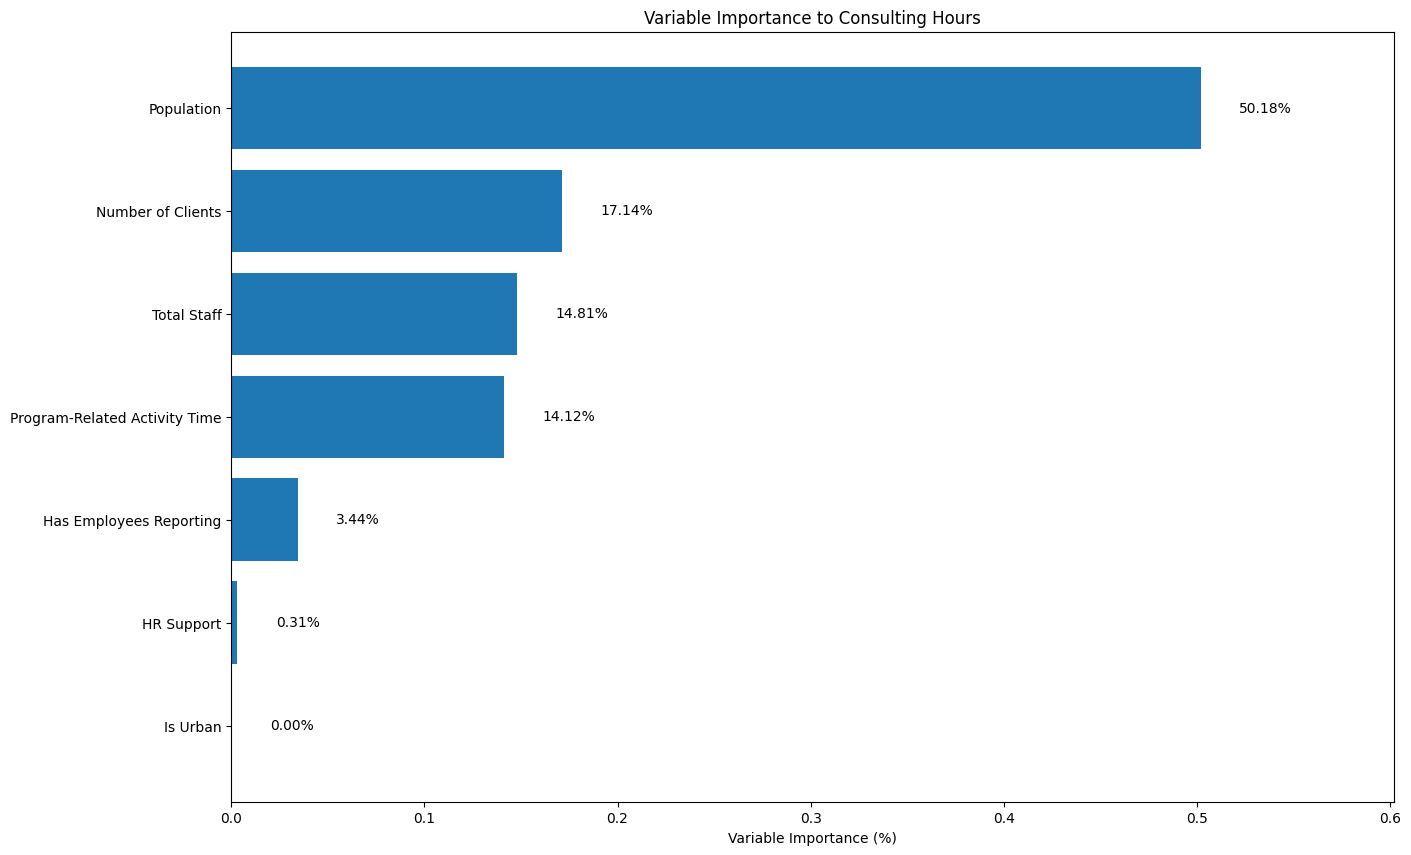

In [21]:
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(15, 10))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width() * 100:.2f}%', va='center')

plt.xlim([0, max(importance_df['Importance']) + 0.1])

plt.xlabel("Variable Importance (%)")
plt.title("Variable Importance to Consulting Hours")

plt.savefig("Deliverables/Variable Importance to Consultant's Hours.png", bbox_inches='tight')

plt.show()

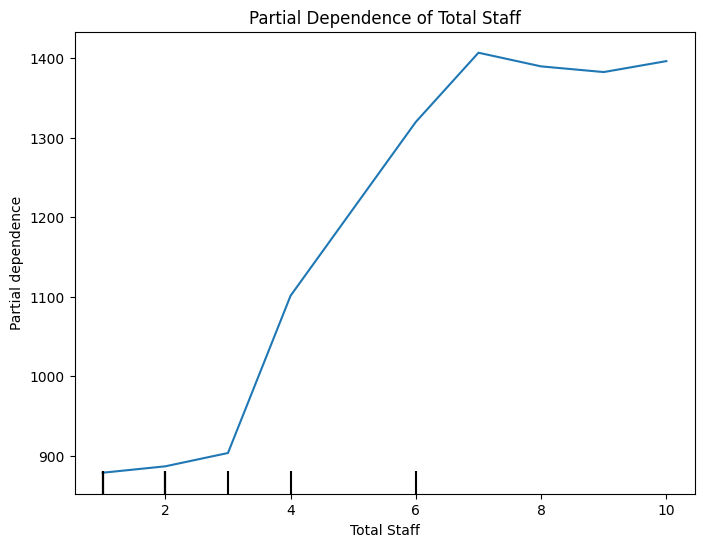

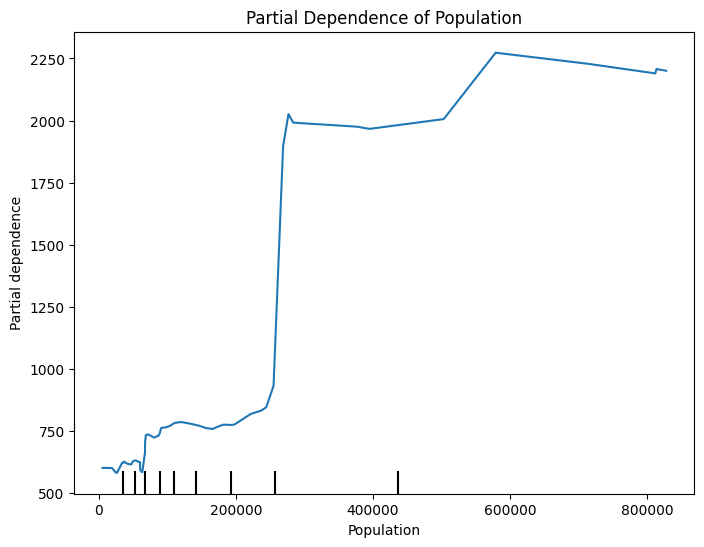

c:\Users\Ghaith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


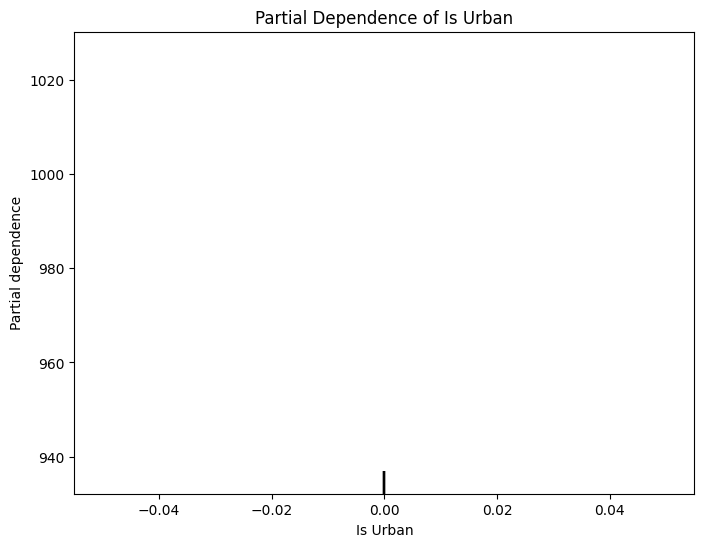

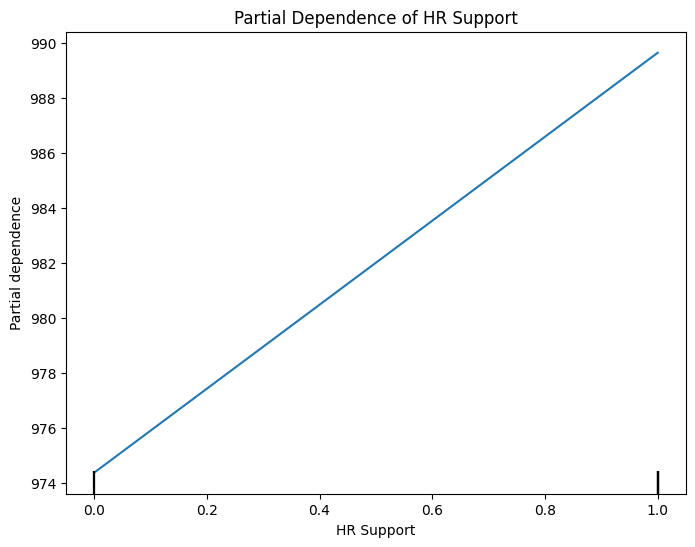

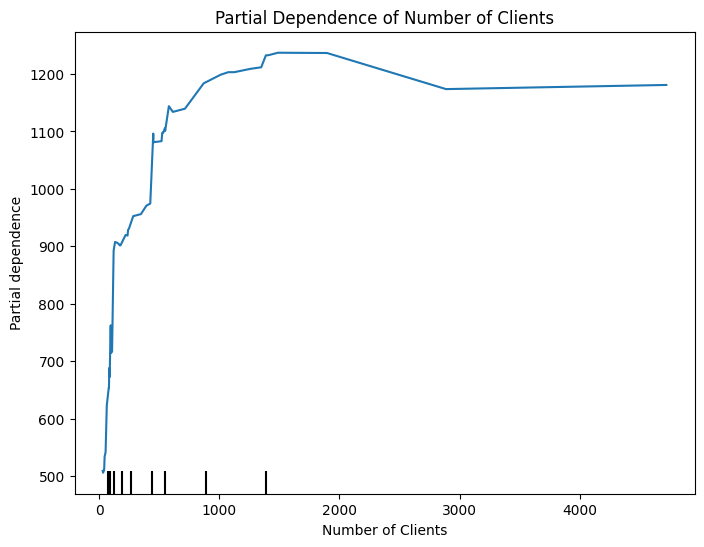

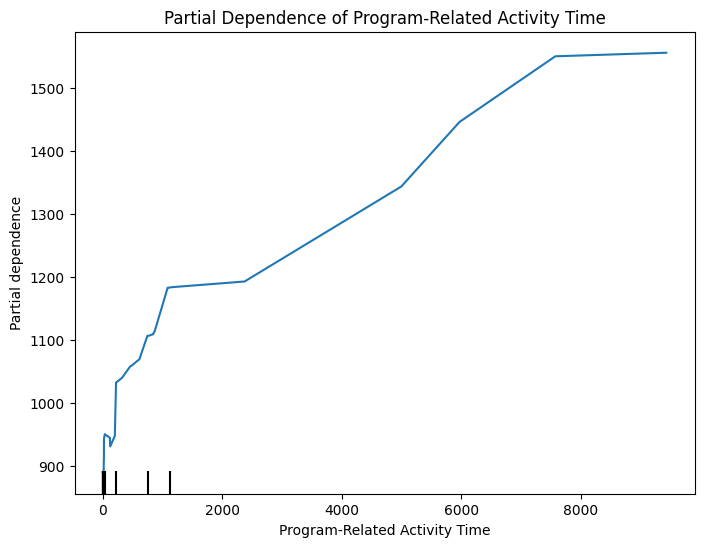

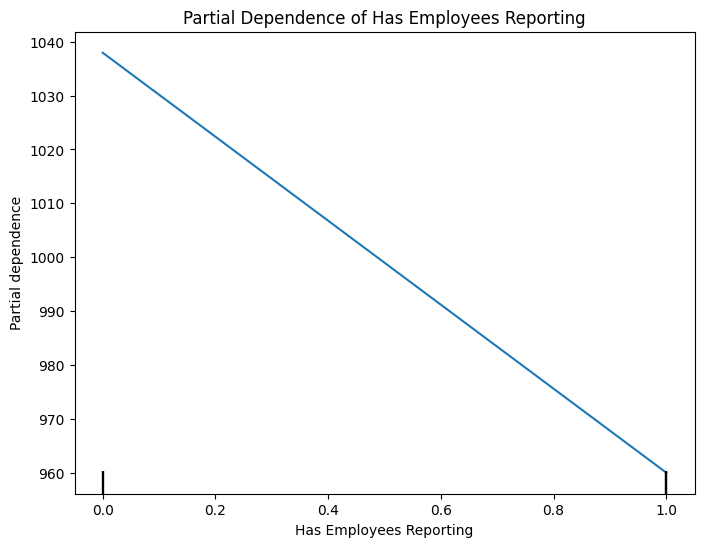

In [22]:
from sklearn.inspection import PartialDependenceDisplay

feature_names = ['Total Staff', 'Population', 'Is Urban', 'HR Support', 'Number of Clients',
                 'Program-Related Activity Time', 'Has Employees Reporting']

fig, ax1 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [0], feature_names=feature_names, ax=ax1)
ax1.set_title('Partial Dependence of Total Staff')
plt.savefig('Deliverables/Total Staff Partial Dependency.png', bbox_inches='tight')
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [1], feature_names=feature_names, ax=ax2)
ax2.set_title('Partial Dependence of Population')
plt.savefig('Deliverables/Population Partial Dependency.png', bbox_inches='tight')
plt.show()

fig, ax3 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [2], feature_names=feature_names, ax=ax3)
ax3.set_title('Partial Dependence of Is Urban')
plt.show()

fig, ax4 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [3], feature_names=feature_names, ax=ax4)
ax4.set_title('Partial Dependence of HR Support')
plt.show()

fig, ax5 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [4], feature_names=feature_names, ax=ax5)
ax5.set_title('Partial Dependence of Number of Clients')
plt.savefig('Deliverables/Number of Clients Partial Dependency.png', bbox_inches='tight')
plt.show()

fig, ax6 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [5], feature_names=feature_names, ax=ax6)
ax6.set_title('Partial Dependence of Program-Related Activity Time')
plt.savefig('Deliverables/Program-Related Activity Partial Dependency.png', bbox_inches='tight')
plt.show()

fig, ax7 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [6], feature_names=feature_names, ax=ax7)
ax7.set_title('Partial Dependence of Has Employees Reporting')
plt.show()

# Comparisons

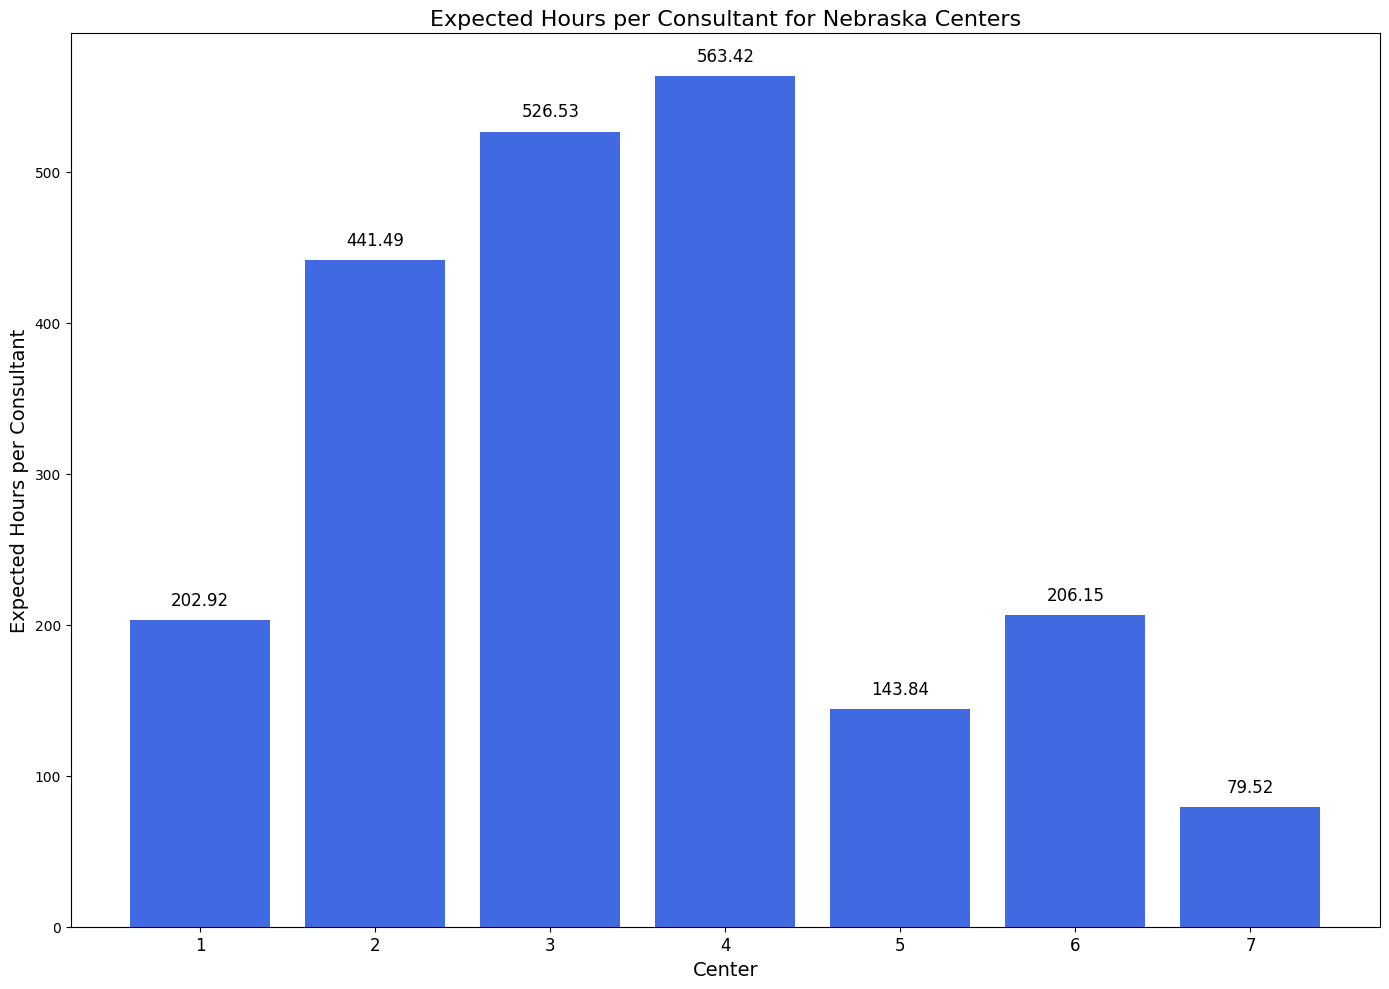

In [23]:
nebraska_centers = center_analysis[center_analysis['State'] == 'Nebraska']

plt.figure(figsize=(14, 10))

bars = plt.bar(nebraska_centers.index, nebraska_centers['Expected Hours per Consultant'], color='royalblue')

plt.title('Expected Hours per Consultant for Nebraska Centers', fontsize=16)
plt.xlabel('Center', fontsize=14)
plt.ylabel('Expected Hours per Consultant', fontsize=14)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{round(height, 2)}', ha='center', fontsize=12)

plt.xticks(nebraska_centers.index, nebraska_centers.index, fontsize=12, wrap=True)

plt.tight_layout()
plt.savefig('Deliverables/Nebraska Expected Consultant Hours Per Center.png', bbox_inches='tight')
plt.show()

In [24]:
state_avg_expected_hours = center_analysis.groupby('State')['Expected Hours per Consultant'].mean().reset_index()

state_avg_expected_hours.columns = ['State', 'Average Expected Hours per Consultant']

state_avg_expected_hours

,State,Average Expected Hours per Consultant
0,Iowa,273.615681
1,Kansas,442.761038
2,Montana,445.299587
3,Nebraska,309.124557
4,New Mexico,381.558161
5,North Dakota,721.122978
6,South Dakota,273.615681
7,Wyoming,580.226778


In [25]:
state_comparisons = center_analysis.groupby('State').mean()

columns_to_compare = [
    'Expected Hours per Consultant', 'Expected Hours per Client'
]

state_comparisons = state_comparisons[columns_to_compare].round(2)

state_comparisons

,Expected Hours per Consultant,Expected Hours per Client
State,,
Iowa,273.62,4.69
Kansas,442.76,4.95
Montana,445.30,4.64
Nebraska,309.12,5.88
New Mexico,381.56,0.65
North Dakota,721.12,5.32
South Dakota,273.62,4.69
Wyoming,580.23,2.91


C:\Users\Ghaith\AppData\Local\Temp\ipykernel_57248\3094995206.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(state_comparisons.index, rotation=45, ha='right', fontsize=12, wrap=True)
C:\Users\Ghaith\AppData\Local\Temp\ipykernel_57248\3094995206.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(state_comparisons.index, rotation=45, ha='right', fontsize=12, wrap=True)


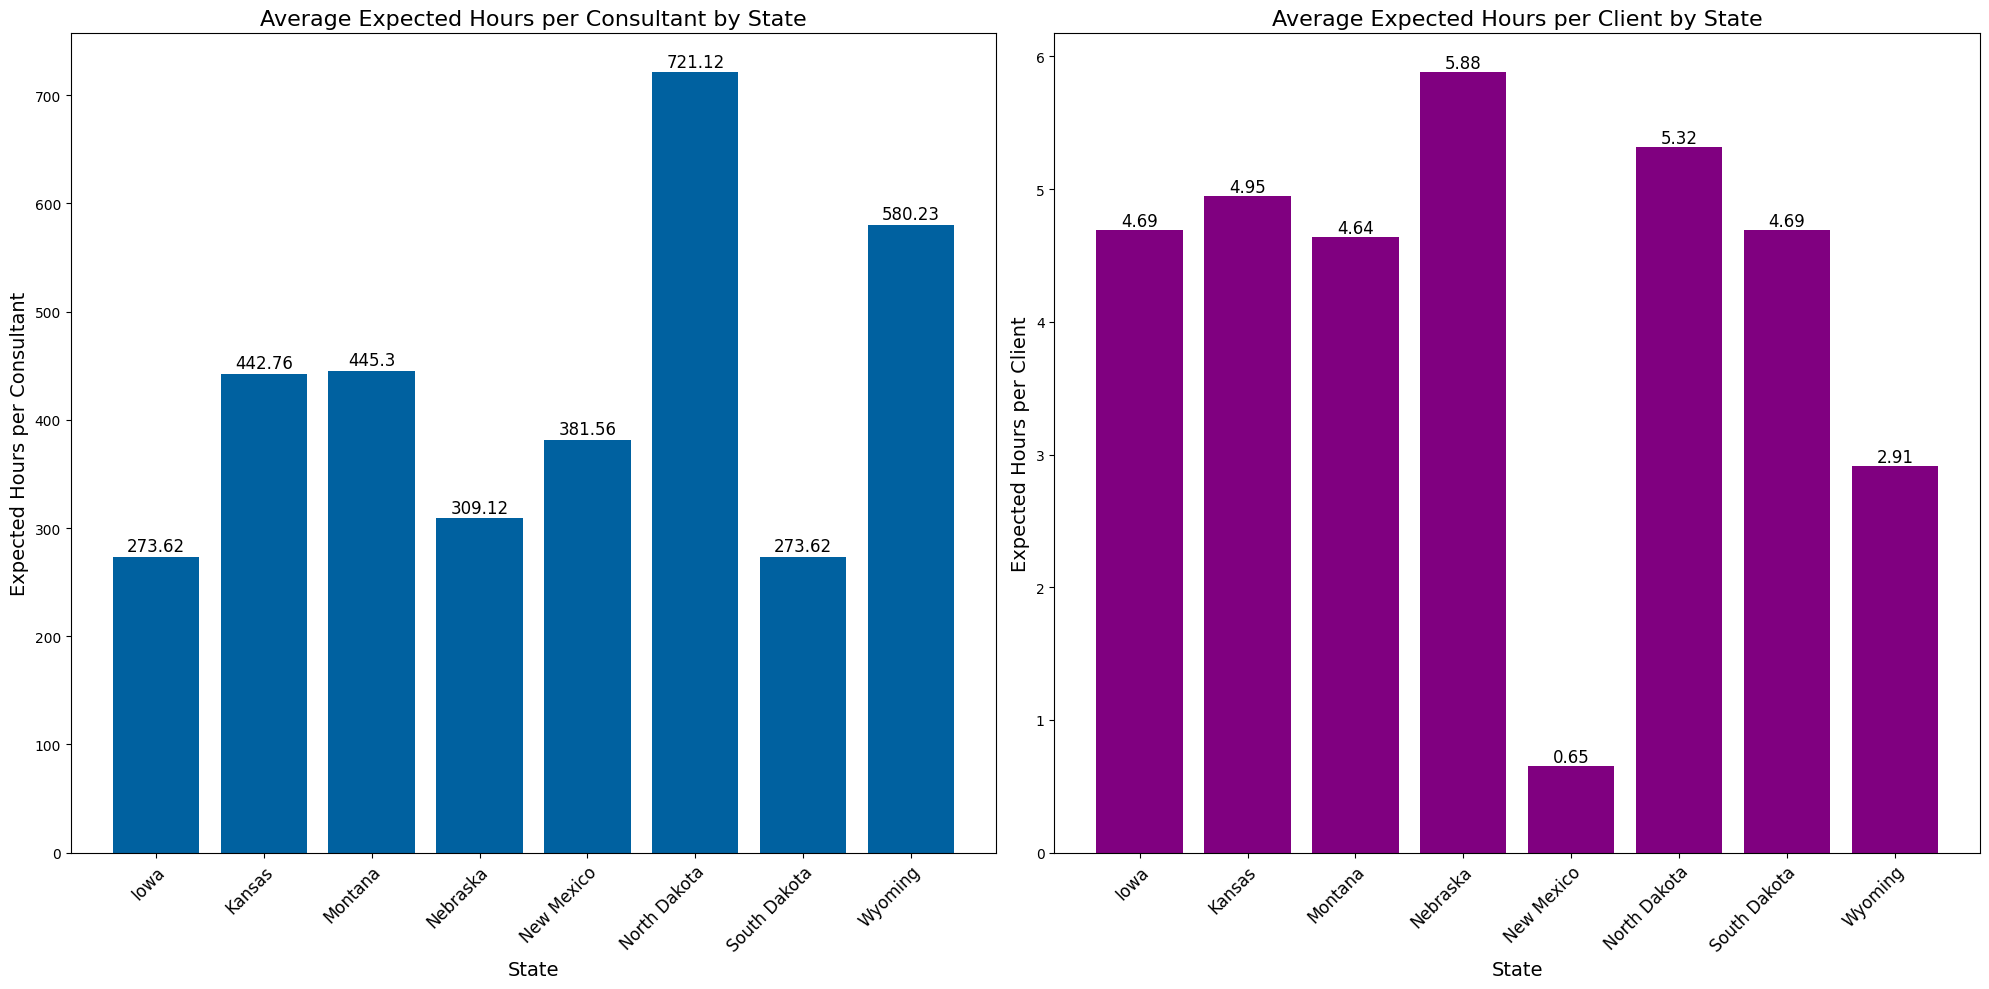

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].bar(state_comparisons.index, state_comparisons['Expected Hours per Consultant'], color='#0061a0')
axes[0].set_title('Average Expected Hours per Consultant by State', fontsize=16)
axes[0].set_xlabel('State', fontsize=14)
axes[0].set_ylabel('Expected Hours per Consultant', fontsize=14)

for i, v in enumerate(state_comparisons['Expected Hours per Consultant']):
    axes[0].text(i, v + 5, str(v), ha='center', fontsize=12)

axes[0].set_xticklabels(state_comparisons.index, rotation=45, ha='right', fontsize=12, wrap=True)

axes[1].bar(state_comparisons.index, state_comparisons['Expected Hours per Client'], color='purple')
axes[1].set_title('Average Expected Hours per Client by State', fontsize=16)
axes[1].set_xlabel('State', fontsize=14)
axes[1].set_ylabel('Expected Hours per Client', fontsize=14)

for i, v in enumerate(state_comparisons['Expected Hours per Client']):
    axes[1].text(i, v + 0.03, str(v), ha='center', fontsize=12)

axes[1].set_xticklabels(state_comparisons.index, rotation=45, ha='right', fontsize=12, wrap=True)

plt.tight_layout()

plt.savefig('Deliverables/All Centers Expected Consultant and Client Hours Comparisons.png', bbox_inches='tight')
plt.show()

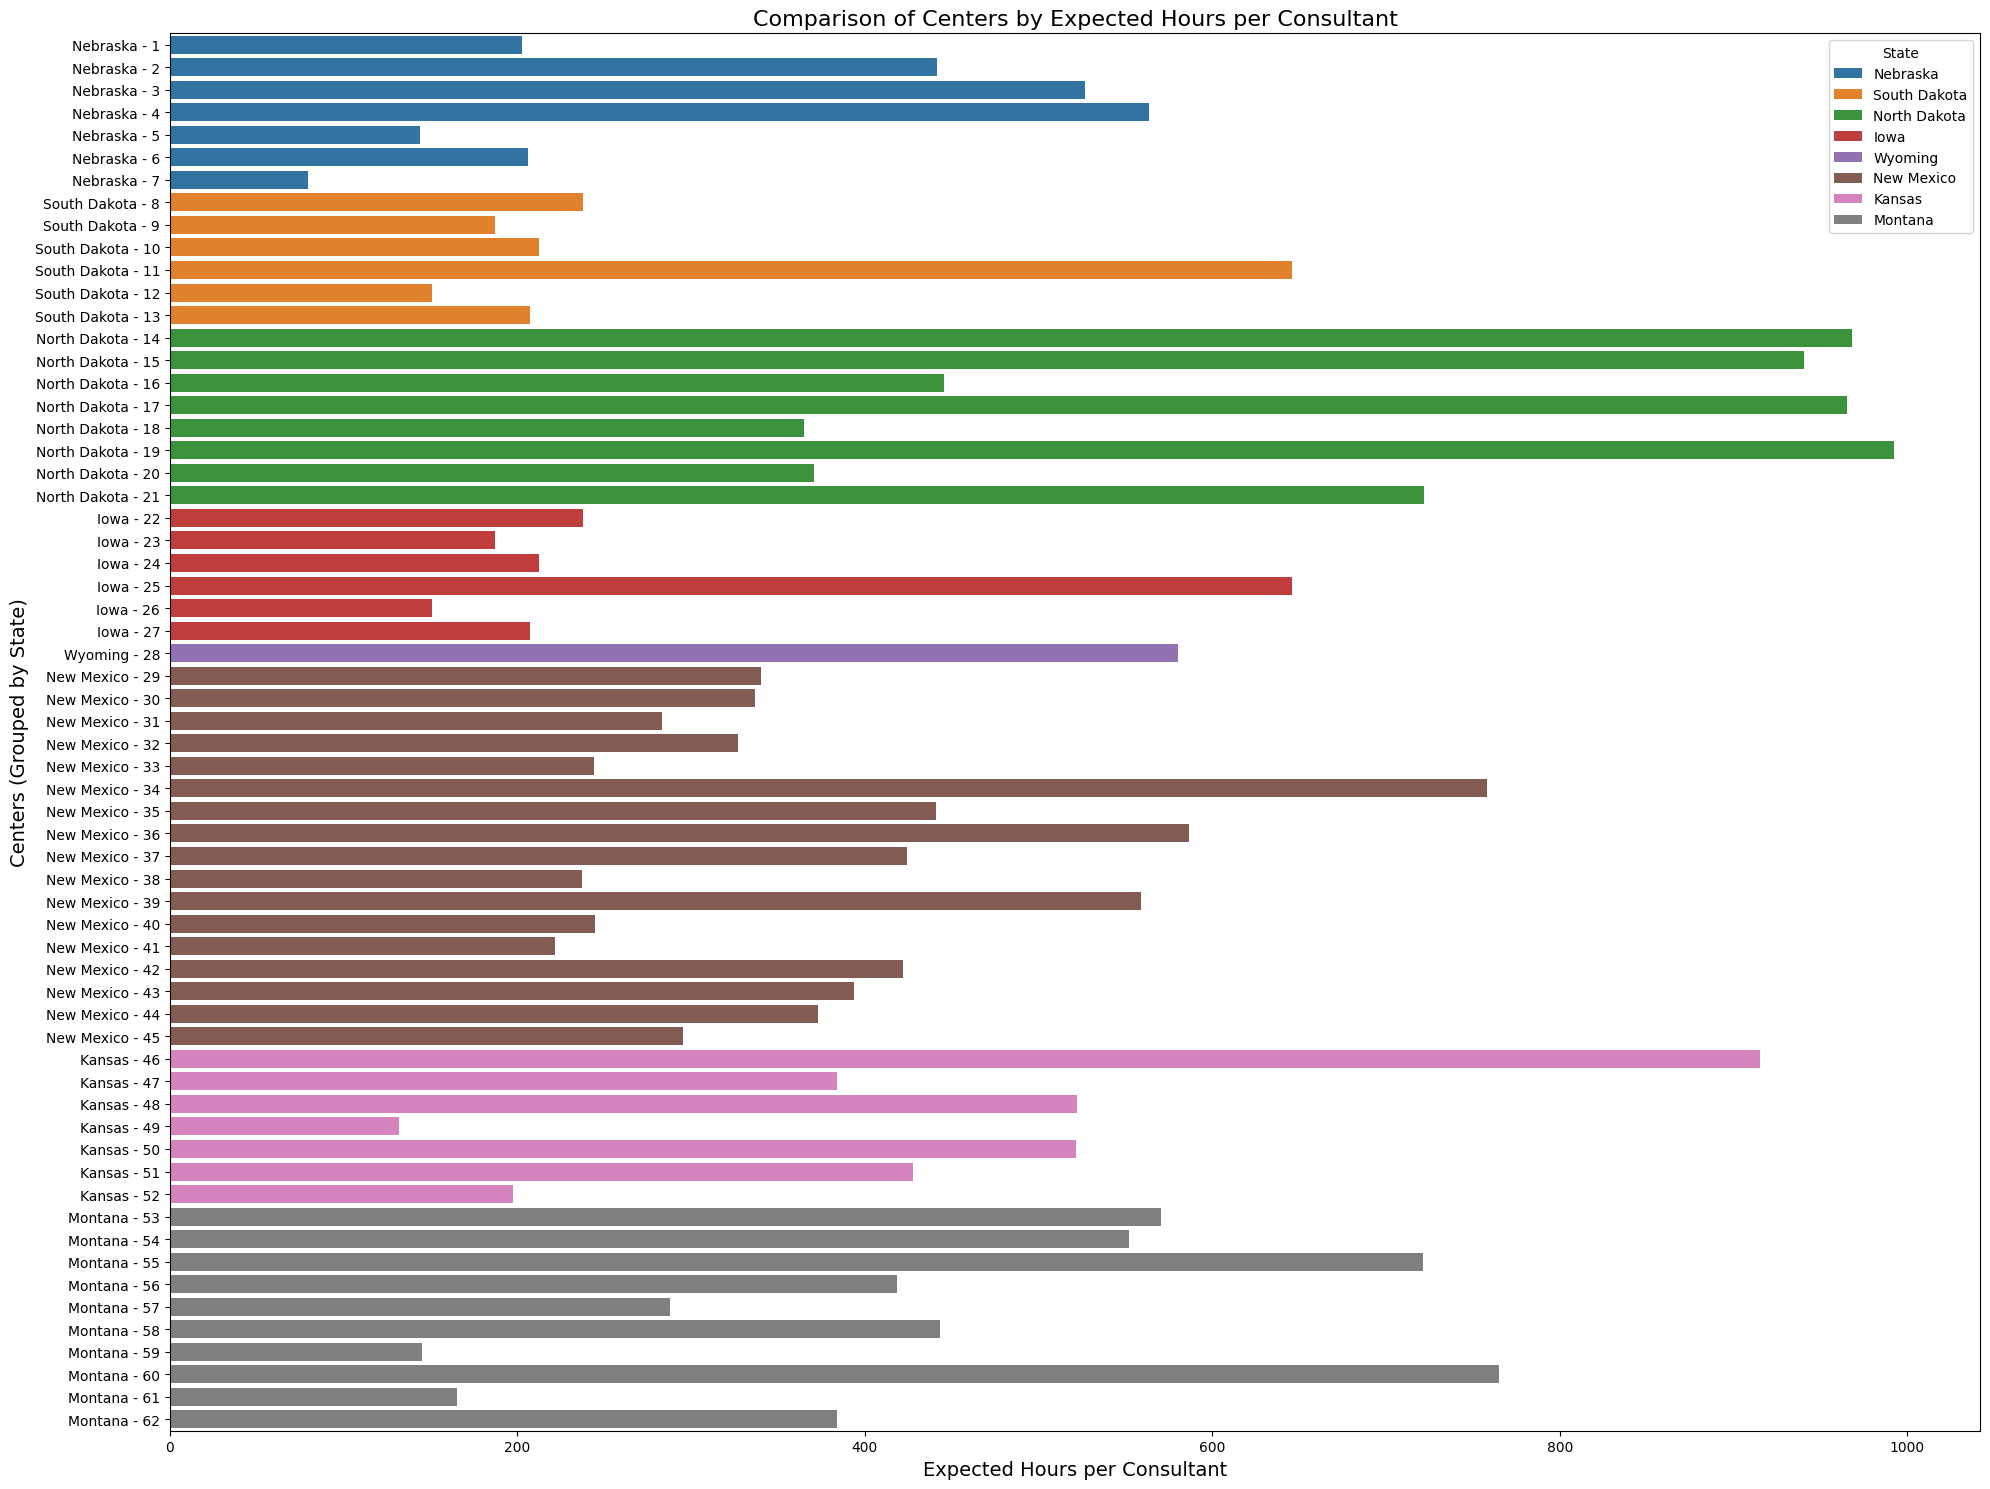

In [27]:
import seaborn as sns

center_analysis['State_Center'] = center_analysis['State'] + ' - ' + center_analysis.index.astype(str)

plt.figure(figsize=(20, 15))

sns.barplot(x='Expected Hours per Consultant', y='State_Center', data=center_analysis, hue='State', dodge=False)

plt.title('Comparison of Centers by Expected Hours per Consultant', fontsize=16)
plt.xlabel('Expected Hours per Consultant', fontsize=14)
plt.ylabel('Centers (Grouped by State)', fontsize=14)

plt.yticks(rotation=0)

plt.tight_layout()
plt.show()